In [1]:
import numpy as np
import xarray as xr
from dask.diagnostics import ProgressBar
from xgcm import Grid
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline

In [2]:
datapath = '/srv/scratch/z3097808/20year_run/20year_freerun_output_NEWnci/'
ts = xr.open_mfdataset(datapath + 'outer_avg_01*.nc', chunks={'ocean_time': 10}, combine='by_coords', decode_coords=True)

In [3]:
ProgressBar().register()
print('Total Size: %6.2F GB' % (ts.nbytes / 1e9))

Total Size:  33.11 GB


In [4]:
ts

<xarray.Dataset>
Dimensions:      (Nuser: 25, boundary: 4, eta_psi: 316, eta_rho: 317, eta_u: 317, eta_v: 316, ocean_time: 540, s_rho: 30, s_w: 31, tracer: 2, xi_psi: 271, xi_rho: 272, xi_u: 271, xi_v: 272)
Coordinates:
    lon_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(317, 272), meta=np.ndarray>
    lat_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(317, 272), meta=np.ndarray>
    lat_u        (eta_u, xi_u) float64 dask.array<chunksize=(317, 271), meta=np.ndarray>
    lat_psi      (eta_psi, xi_psi) float64 dask.array<chunksize=(316, 271), meta=np.ndarray>
    lon_v        (eta_v, xi_v) float64 dask.array<chunksize=(316, 272), meta=np.ndarray>
    lon_psi      (eta_psi, xi_psi) float64 dask.array<chunksize=(316, 271), meta=np.ndarray>
    lat_v        (eta_v, xi_v) float64 dask.array<chunksize=(316, 272), meta=np.ndarray>
    lon_u        (eta_u, xi_u) float64 dask.array<chunksize=(317, 271), meta=np.ndarray>
  * s_w          (s_w) float64 -1.0 -0.9433 -0.8883 ... -0.02161 -0.01 0.0
  * s_rho        (s_rho) float64 -0.9715 -0.9156 -0.8614 ... -0.0156 -0.004799
  * ocean_time   (ocean_time) datetime64[ns] 1994-01-01T12:00:00 ... 1995-06-24T12:00:00
Dimensions without coordinates: Nuser, boundary, eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    ntimes       (ocean_time) int32 8640 8640 8640 8640 ... 8640 8640 8640 8640
    ndtfast      (ocean_time) int32 35 35 35 35 35 35 35 ... 35 35 35 35 35 35
    dt           (ocean_time) float64 300.0 300.0 300.0 ... 300.0 300.0 300.0
    dtfast       (ocean_time) float64 8.571 8.571 8.571 ... 8.571 8.571 8.571
    dstart       (ocean_time) datetime64[ns] 1994-01-01 ... 1995-05-26
    nHIS         (ocean_time) int32 8640 8640 8640 8640 ... 8640 8640 8640 8640
    ndefHIS      (ocean_time) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    nRST         (ocean_time) int32 8640 8640 8640 8640 ... 8640 8640 8640 8640
    ntsAVG       (ocean_time) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    nAVG         (ocean_time) int32 288 288 288 288 288 ... 288 288 288 288 288
    ndefAVG      (ocean_time) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    Falpha       (ocean_time) float64 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
    Fbeta        (ocean_time) float64 4.0 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    Fgamma       (ocean_time) float64 0.284 0.284 0.284 ... 0.284 0.284 0.284
    nl_tnu2      (ocean_time, tracer) float64 dask.array<chunksize=(30, 2), meta=np.ndarray>
    nl_visc2     (ocean_time) float64 55.0 55.0 55.0 55.0 ... 55.0 55.0 55.0
    Akt_bak      (ocean_time, tracer) float64 dask.array<chunksize=(30, 2), meta=np.ndarray>
    Akv_bak      (ocean_time) float64 2e-05 2e-05 2e-05 ... 2e-05 2e-05 2e-05
    Akk_bak      (ocean_time) float64 5e-06 5e-06 5e-06 ... 5e-06 5e-06 5e-06
    Akp_bak      (ocean_time) float64 5e-06 5e-06 5e-06 ... 5e-06 5e-06 5e-06
    rdrg         (ocean_time) float64 0.0003 0.0003 0.0003 ... 0.0003 0.0003
    rdrg2        (ocean_time) float64 0.003 0.003 0.003 ... 0.003 0.003 0.003
    Zob          (ocean_time) float64 0.02 0.02 0.02 0.02 ... 0.02 0.02 0.02
    Zos          (ocean_time) float64 0.02 0.02 0.02 0.02 ... 0.02 0.02 0.02
    Znudg        (ocean_time) float64 0.1429 0.1429 0.1429 ... 0.1429 0.1429
    M2nudg       (ocean_time) float64 0.1429 0.1429 0.1429 ... 0.1429 0.1429
    M3nudg       (ocean_time) float64 0.1429 0.1429 0.1429 ... 0.1429 0.1429
    Tnudg        (ocean_time, tracer) float64 dask.array<chunksize=(30, 2), meta=np.ndarray>
    FSobc_in     (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    FSobc_out    (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    M2obc_in     (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    M2obc_out    (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    Tobc_in      (ocean_time, boundary, tracer) float64 dask.array<

In [5]:

i = 150         # southward boundary
ii = 200         # northward boundary
j = 90          # westward boundary
jj = 140         # eastward boundary
ds = ts.isel(eta_psi=slice(i,ii-1), eta_rho=slice(i,ii), eta_u=slice(i,ii), eta_v=slice(i,ii-1),
             xi_psi=slice(j,jj-1), xi_rho=slice(j,jj), xi_u=slice(j,jj-1), xi_v=slice(j,jj))
ds

<xarray.Dataset>
Dimensions:      (Nuser: 25, boundary: 4, eta_psi: 49, eta_rho: 50, eta_u: 50, eta_v: 49, ocean_time: 540, s_rho: 30, s_w: 31, tracer: 2, xi_psi: 49, xi_rho: 50, xi_u: 49, xi_v: 50)
Coordinates:
    lon_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(50, 50), meta=np.ndarray>
    lat_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(50, 50), meta=np.ndarray>
    lat_u        (eta_u, xi_u) float64 dask.array<chunksize=(50, 49), meta=np.ndarray>
    lat_psi      (eta_psi, xi_psi) float64 dask.array<chunksize=(49, 49), meta=np.ndarray>
    lon_v        (eta_v, xi_v) float64 dask.array<chunksize=(49, 50), meta=np.ndarray>
    lon_psi      (eta_psi, xi_psi) float64 dask.array<chunksize=(49, 49), meta=np.ndarray>
    lat_v        (eta_v, xi_v) float64 dask.array<chunksize=(49, 50), meta=np.ndarray>
    lon_u        (eta_u, xi_u) float64 dask.array<chunksize=(50, 49), meta=np.ndarray>
  * s_w          (s_w) float64 -1.0 -0.9433 -0.8883 ... -0.02161 -0.01 0.0
  * s_rho        (s_rho) float64 -0.9715 -0.9156 -0.8614 ... -0.0156 -0.004799
  * ocean_time   (ocean_time) datetime64[ns] 1994-01-01T12:00:00 ... 1995-06-24T12:00:00
Dimensions without coordinates: Nuser, boundary, eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    ntimes       (ocean_time) int32 8640 8640 8640 8640 ... 8640 8640 8640 8640
    ndtfast      (ocean_time) int32 35 35 35 35 35 35 35 ... 35 35 35 35 35 35
    dt           (ocean_time) float64 300.0 300.0 300.0 ... 300.0 300.0 300.0
    dtfast       (ocean_time) float64 8.571 8.571 8.571 ... 8.571 8.571 8.571
    dstart       (ocean_time) datetime64[ns] 1994-01-01 ... 1995-05-26
    nHIS         (ocean_time) int32 8640 8640 8640 8640 ... 8640 8640 8640 8640
    ndefHIS      (ocean_time) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    nRST         (ocean_time) int32 8640 8640 8640 8640 ... 8640 8640 8640 8640
    ntsAVG       (ocean_time) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    nAVG         (ocean_time) int32 288 288 288 288 288 ... 288 288 288 288 288
    ndefAVG      (ocean_time) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    Falpha       (ocean_time) float64 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
    Fbeta        (ocean_time) float64 4.0 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    Fgamma       (ocean_time) float64 0.284 0.284 0.284 ... 0.284 0.284 0.284
    nl_tnu2      (ocean_time, tracer) float64 dask.array<chunksize=(30, 2), meta=np.ndarray>
    nl_visc2     (ocean_time) float64 55.0 55.0 55.0 55.0 ... 55.0 55.0 55.0
    Akt_bak      (ocean_time, tracer) float64 dask.array<chunksize=(30, 2), meta=np.ndarray>
    Akv_bak      (ocean_time) float64 2e-05 2e-05 2e-05 ... 2e-05 2e-05 2e-05
    Akk_bak      (ocean_time) float64 5e-06 5e-06 5e-06 ... 5e-06 5e-06 5e-06
    Akp_bak      (ocean_time) float64 5e-06 5e-06 5e-06 ... 5e-06 5e-06 5e-06
    rdrg         (ocean_time) float64 0.0003 0.0003 0.0003 ... 0.0003 0.0003
    rdrg2        (ocean_time) float64 0.003 0.003 0.003 ... 0.003 0.003 0.003
    Zob          (ocean_time) float64 0.02 0.02 0.02 0.02 ... 0.02 0.02 0.02
    Zos          (ocean_time) float64 0.02 0.02 0.02 0.02 ... 0.02 0.02 0.02
    Znudg        (ocean_time) float64 0.1429 0.1429 0.1429 ... 0.1429 0.1429
    M2nudg       (ocean_time) float64 0.1429 0.1429 0.1429 ... 0.1429 0.1429
    M3nudg       (ocean_time) float64 0.1429 0.1429 0.1429 ... 0.1429 0.1429
    Tnudg        (ocean_time, tracer) float64 dask.array<chunksize=(30, 2), meta=np.ndarray>
    FSobc_in     (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    FSobc_out    (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    M2obc_in     (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    M2obc_out    (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    Tobc_in      (ocean_time, boundary, tracer) float64 dask.array<chunksize=(30, 4, 2), me

In [6]:
ds.lon_rho[0,0].values

[########################################] | 100% Completed |  0.1s


array(152.33806246)

# Creating a grid object
While xgcm doesn't currently have an implementation for the SGRID convention for ROMS, a workaround consist on renaming eta_u and xi_v dimensions to rho. With this replacement 'psi' points have now a position (eta_v, xi_u). See issue here https://github.com/xgcm/xgcm/issues/108

Here I also test to see if the new XGCM 'metrics' functionality works.

In [7]:
# Including metrics
ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})

coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
    'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
    'Z':{'center':'s_rho', 'outer':'s_w'}}

grid = Grid(ds, coords=coords, periodic=[])

Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho = Zo_rho * (ds.zeta + ds.h) + ds.zeta
Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
z_w = Zo_w * (ds.zeta + ds.h) + ds.zeta

ds.coords['z_w'] = z_w.where(ds.mask_rho, 0).transpose('ocean_time', 's_w', 'eta_rho', 'xi_rho')
ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')


ds['pm_v'] = grid.interp(ds.pm, 'Y')
ds['pn_u'] = grid.interp(ds.pn, 'X')
ds['pm_u'] = grid.interp(ds.pm, 'X')
ds['pn_v'] = grid.interp(ds.pn, 'Y')
ds['pm_psi'] = grid.interp(grid.interp(ds.pm, 'Y'),  'X') # at psi points (eta_v, xi_u) 
ds['pn_psi'] = grid.interp(grid.interp(ds.pn, 'X'),  'Y') # at psi points (eta_v, xi_u)

ds['dx'] = 1/ds.pm
ds['dx_u'] = 1/ds.pm_u
ds['dx_v'] = 1/ds.pm_v
ds['dx_psi'] = 1/ds.pm_psi

ds['dy'] = 1/ds.pn
ds['dy_u'] = 1/ds.pn_u
ds['dy_v'] = 1/ds.pn_v
ds['dy_psi'] = 1/ds.pn_psi

ds['dz'] = grid.diff(ds.z_w, 'Z', boundary='fill')
ds['dz_w'] = grid.diff(ds.z_rho, 'Z', boundary='fill')
ds['dz_u'] = grid.interp(ds.dz, 'X')
ds['dz_w_u'] = grid.interp(ds.dz_w, 'X')
ds['dz_v'] = grid.interp(ds.dz, 'Y')
ds['dz_w_v'] = grid.interp(ds.dz_w, 'Y')

ds['dA'] = ds.dx * ds.dy

metrics = {
    ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
    ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
    ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
    ('X', 'Y'): ['dA'] # Areas
}
grid = Grid(ds, coords=coords, metrics=metrics, periodic=[])

/home/z3526974/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  from ipykernel import kernelapp as app
/home/z3526974/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  app.launch_new_instance()


In [8]:
grid

<xgcm.Grid>
X Axis (not periodic):
  * center   xi_rho --> inner
  * inner    xi_u --> center
Y Axis (not periodic):
  * center   eta_rho --> inner
  * inner    eta_v --> center
Z Axis (not periodic):
  * center   s_rho --> outer
  * outer    s_w --> center

In [9]:
#calculate temperature advection at each gridpoint
ds['T_u'] = grid.interp(ds.u, axis='X', boundary = 'extend')*ds.temp
ds['T_v'] = grid.interp(ds.v, axis='Y', boundary = 'extend')*ds.temp

ds['T_uz'] = grid.integrate(ds.T_u, 'Z')
ds['T_vz']= grid.integrate(ds.T_v, 'Z')
ds.T_uz

<xarray.DataArray 'T_uz' (ocean_time: 540, eta_rho: 50, xi_rho: 50)>
dask.array<sum-aggregate, shape=(540, 50, 50), dtype=float64, chunksize=(10, 50, 48), chunktype=numpy.ndarray>
Coordinates:
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(50, 50), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(50, 50), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 1994-01-01T12:00:00 ... 1995-06-24T12:00:00
Dimensions without coordinates: eta_rho, xi_rho

[########################################] | 100% Completed |  0.2s


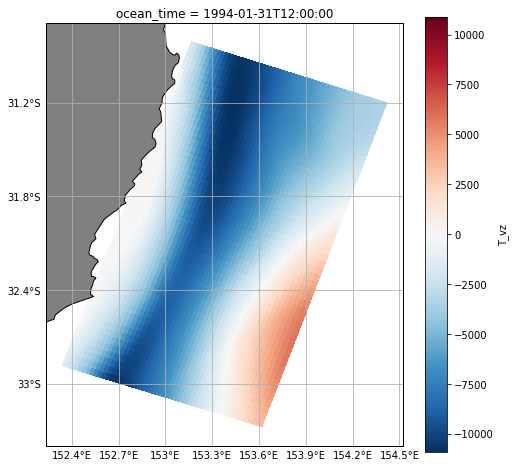

In [10]:
fig = plt.figure(figsize=(8,8))
coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',
                            facecolor='none', name='coastline')
ax = plt.axes(projection=ccrs.PlateCarree())
feature = ax.add_feature(coast, edgecolor='black',facecolor='gray')
ds.T_vz.sel(ocean_time='1994-01-31T12').plot(ax=ax, transform=ccrs.PlateCarree(), 
                                        x='lon_rho', y='lat_rho', cmap='RdBu_r')
gl = ax.gridlines(draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = gl.ylabels_right = False

[########################################] | 100% Completed |  1.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


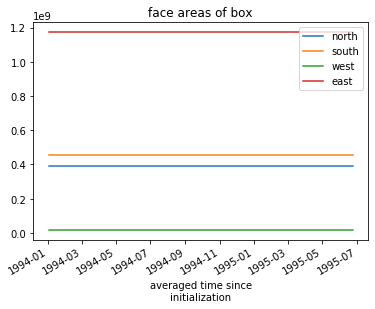

In [11]:
Area_n = grid.integrate(ds.h, ['X']).sel(eta_rho=0)
Area_n.plot(label='north')
Area_s = grid.integrate(ds.h, ['X']).sel(eta_rho=49)
Area_s.plot(label='south')
Area_w = grid.integrate(ds.h, ['Y']).sel(xi_rho=0)
Area_w.plot(label='west')
Area_e = grid.integrate(ds.h, ['Y']).sel(xi_rho=49)
Area_e.plot(label='east')
plt.title('face areas of box')
plt.legend()

In [12]:
#Calculate heat transport
Cp = 4181.3
Rho_0 = 1025

In [16]:
s = (Cp*Rho_0*grid.integrate(ds.T_vz, 'X').sel(eta_rho=49))/Area_s
n = (Cp*Rho_0*grid.integrate(ds.T_vz, 'X').sel(eta_rho=0)*-1)/Area_n
w = (Cp*Rho_0*grid.integrate(ds.T_uz, 'Y').sel(xi_rho=0)*-1)/Area_w
e = (Cp*Rho_0*grid.integrate(ds.T_uz, 'Y').sel(xi_rho=49))/Area_e
tot_heat_adv = n+s+e+w

[########################################] | 100% Completed |  2min 33.2s


Text(0.5, 1.0, 'heat transport into box')

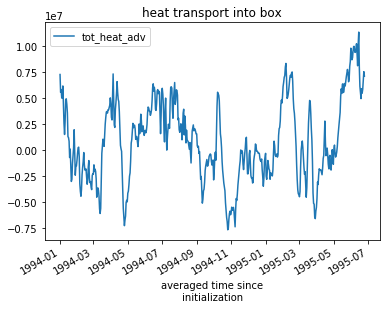

In [17]:
# n.plot(label='north')
# s.plot(label='south')
# e.plot(label='east')
# w.plot(label='west')
tot_heat_adv.plot(label='tot_heat_adv')
plt.legend()
plt.title('heat transport into box')
#plt.savefig('heat_transport.png', dpi=300,bbox_inches='tight')

[########################################] | 100% Completed | 17.5s


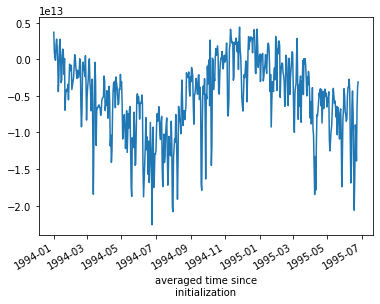

In [21]:
# Surface heat flux (per m2)
tot_Q = grid.integrate(ds.shflux, ['X','Y'])
tot_Q.plot()

In [22]:
# Temperature tendency
Temp_z = grid.integrate(ds.temp, ['X','Y','Z'])


[########################################] | 100% Completed |  1min 15.1s


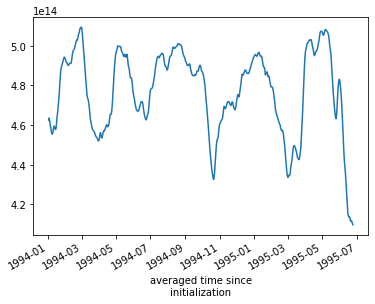

In [23]:
Temp_z.plot()

In [27]:
ProgressBar().unregister()